In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [5]:
df_titanic = pd.read_csv("Data_Titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [22]:
def missing_value(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100* df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis= 1)
    mis_val_table_ren_cloumns=mis_val_table.rename(
    columns={0:'so gia tri missing',1:'ty le % missing'})
    mis_val_table_ren_cloumns= mis_val_table_ren_cloumns[
         mis_val_table_ren_cloumns.iloc[:,1] !=0].sort_values(
        'ty le % missing',ascending=False).round(2)
    print("file du lieu bao gom co : "+str(df.shape[1])+"cot.\n co"
         +str( mis_val_table_ren_cloumns.shape[0])+"cot chua missing value")
    return  mis_val_table_ren_cloumns

In [23]:
print("so luong missing data")
missing_value(df_titanic)

so luong missing data
file du lieu bao gom co : 12cot.
 co4cot chua missing value


,so gia tri missing,ty le % missing
Cabin,1014,77.46
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08


In [24]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [27]:
df_titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [28]:
df_titanic[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


In [30]:
df_titanic[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.82618
1,male,0.12930


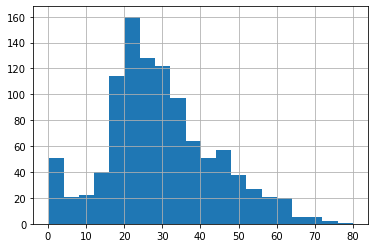

In [33]:
plt.hist(df_titanic.Age,bins=20)
plt.grid(True)
plt.show()

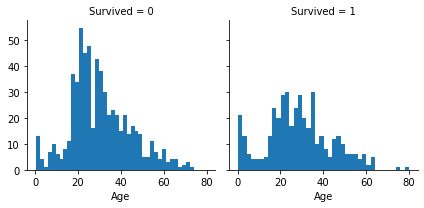

In [34]:
g=sns.FacetGrid(df_titanic ,col='Survived')
g.map(plt.hist,'Age',bins=40)

In [38]:
df_titanic[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.520376
2,2,0.452381
0,0,0.334456
3,3,0.250000
4,4,0.181818
5,5,0.166667
6,8,0.111111


In [40]:
df_titanic[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.625000
1,1,0.547059
2,2,0.530973
7,9,0.500000
4,4,0.333333
0,0,0.331337
5,5,0.166667
6,6,0.000000


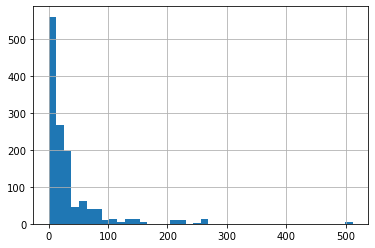

In [42]:
plt.hist(df_titanic.Fare,bins=40)
plt.grid(True)
plt.show()

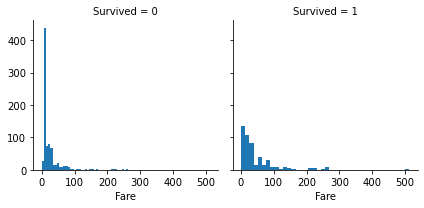

In [45]:
g=sns.FacetGrid(df_titanic,col='Survived')
g.map(plt.hist,'Fare',bins=40)

In [48]:
df_titanic[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.492593
1,Q,0.439024
2,S,0.333698


In [51]:
df_titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [53]:
df_data=df_titanic.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [55]:
df_data[df_data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [56]:
df_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [60]:
df_data['Embarked']=df_data['Embarked'].fillna('S')

In [61]:
df_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Embarked      0
embarked      0
dtype: int64

In [62]:
df_data[df_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,embarked
5,0,3,male,NaN,0,0,Q,Q
17,1,2,male,NaN,0,0,S,S
19,1,3,female,NaN,0,0,C,C
26,0,3,male,NaN,0,0,C,C
28,1,3,female,NaN,0,0,Q,Q
...,...,...,...,...,...,...,...,...
1299,1,3,female,NaN,0,0,Q,Q
1301,1,3,female,NaN,0,0,Q,Q
1304,0,3,male,NaN,0,0,S,S
1307,0,3,male,NaN,0,0,S,S


C:\Users\Chinh\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


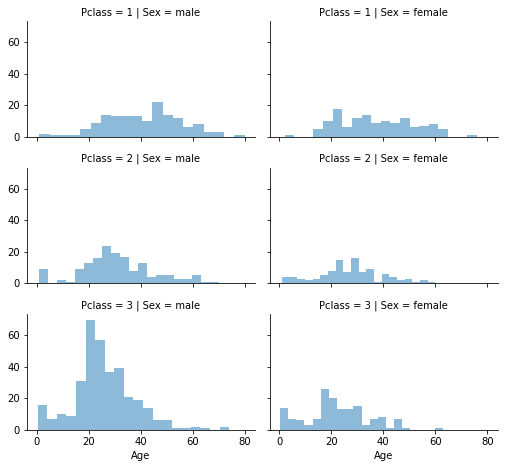

In [64]:
g =sns.FacetGrid(df_data,row='Pclass',col='Sex',size=2.2,aspect=1.6)
g.map(plt.hist,'Age',alpha=.5,bins=20)
g.add_legend()

In [65]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   embarked  1309 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 81.9+ KB


In [66]:
df_male_1=df_data[(df_data['Sex']=='male')&(df_data['Pclass']==1)]

In [68]:
Age_mean_male_1=round(df_male_1['Age'].mean(),0)
print(Age_mean_male_1)

41.0


In [69]:
df_data[(df_data['Sex']=='male') & (df_data['Pclass']==1) & (df_data['Age'].isnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,embarked
55,1,1,male,NaN,0,0,S,S
64,0,1,male,NaN,0,0,C,C
168,0,1,male,NaN,0,0,S,S
185,0,1,male,NaN,0,0,S,S
270,0,1,male,NaN,0,0,S,S
284,0,1,male,NaN,0,0,S,S
295,0,1,male,NaN,0,0,C,C
298,1,1,male,NaN,0,0,S,S
351,0,1,male,NaN,0,0,S,S
475,0,1,male,NaN,0,0,S,S


In [71]:
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==1) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_1

In [72]:
df_data.iloc[[55,64,168,185,270],:]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,embarked
55,1,1,male,41.0,0,0,S,S
64,0,1,male,41.0,0,0,C,C
168,0,1,male,41.0,0,0,S,S
185,0,1,male,41.0,0,0,S,S
270,0,1,male,41.0,0,0,S,S


In [73]:
df_male_2 =  df_data[(df_data['Sex']=='male') & (df_data['Pclass']==2)]
Age_mean_male_2 = round(df_male_2['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==2) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_2

In [74]:
df_male_3 =  df_data[(df_data['Sex']=='male') & (df_data['Pclass']==3)]
Age_mean_male_3 = round(df_male_3['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='male') & (df_data['Pclass']==3) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_male_3

In [75]:
df_female_1 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==1)]
Age_mean_female_1 = round(df_female_1['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==1) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_1

In [76]:
df_female_2 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==2)]
Age_mean_female_2 = round(df_female_2['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==2) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_2

In [77]:
df_female_3 =  df_data[(df_data['Sex']=='female') & (df_data['Pclass']==3)]
Age_mean_female_3 = round(df_female_3['Age'].mean(),0)
df_data.loc[(df_data['Sex']=='female') & (df_data['Pclass']==3) & (df_data['Age'].isnull()),\
            'Age'] = Age_mean_female_3

In [79]:
missing_value(df_data)

file du lieu bao gom co : 8cot.
 co0cot chua missing value


,so gia tri missing,ty le % missing


In [83]:
n=5
df_temp=df_data.copy()
df_temp['AgeBand']=pd.cut(df_temp['Age'],n)
df_temp[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.522388
3,"(48.068, 64.034]",0.424528
2,"(32.102, 48.068]",0.399351
1,"(16.136, 32.102]",0.339572
4,"(64.034, 80.0]",0.153846


In [84]:
df_data.loc[ df_data['Age'] <= 16, 'Age'] = 0
df_data.loc[(df_data['Age'] > 16) & (df_data['Age'] <= 32), 'Age'] = 1
df_data.loc[(df_data['Age'] > 32) & (df_data['Age'] <= 48), 'Age'] = 2
df_data.loc[(df_data['Age'] > 48) & (df_data['Age'] <= 64), 'Age'] = 3
df_data.loc[ df_data['Age'] > 64, 'Age'] = 4

In [85]:
df_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,embarked
0,0,3,male,1.0,1,0,S,S
1,1,1,female,2.0,1,0,C,C
2,1,3,female,1.0,0,0,S,S
3,1,1,female,2.0,1,0,S,S
4,0,3,male,2.0,0,0,S,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,1.0,0,0,S,S
1305,1,1,female,2.0,0,0,C,C
1306,0,3,male,2.0,0,0,S,S
1307,0,3,male,1.0,0,0,S,S


In [87]:
df_data['Age']=df_data['Age'].astype(int)

In [88]:
df_data['Sex']=df_data['Sex'].map({'male':0,'female':1}).astype(int)

In [89]:
df_data['Embarked'] = df_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,embarked
0,0,3,0,1,1,0,0,S
1,1,1,1,2,1,0,1,C
2,1,3,1,1,0,0,0,S
3,1,1,1,2,1,0,0,S
4,0,3,0,2,0,0,0,S


In [90]:
#######

In [92]:
y=df_data.iloc[:,0].values
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [96]:
x=df_data.iloc[:,[1,2,3,4,5,6]].values
x

array([[3, 0, 1, 1, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [3, 1, 1, 0, 0, 0],
       ...,
       [3, 0, 2, 0, 0, 0],
       [3, 0, 1, 0, 0, 0],
       [3, 0, 1, 1, 1, 1]], dtype=int64)

In [97]:
## tach du lieu

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [103]:
X_train.shape

(1047, 6)

In [104]:
X_test.shape

(262, 6)

In [105]:
Y_train.shape

(1047,)

In [106]:
Y_test.shape

(262,)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [150]:
KNN=KNeighborsClassifier(n_neighbors=9,
                          weights = 'distance',
                          algorithm='ball_tree',
                          p=2)

In [151]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [152]:
acc_train =KNN.score(X_train,Y_train)
print(round(acc_train*100,2))

89.11


In [153]:
y_pred=KNN.predict(X_test)
print("do chinh xac cua thuạt toan",round(accuracy_score(Y_test,y_pred)*100,2))

do chinh xac cua thuạt toan 85.11


In [154]:
model=KNN.predict([[3, 0, 1, 1, 0, 0]])
model

array([0], dtype=int64)